# 📊 Hospital SQL Analysis - Jupyter Notebook
# Author: Nivin Benny

## Importing Libraries

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

## Connect to your PostgreSQL Database

In [2]:
# Load environment variables from .env file
load_dotenv(dotenv_path='.env')

# Setup database connection
conn = psycopg2.connect(
    host=os.getenv("DB_HOST"),
    database=os.getenv("DB_NAME"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    port=os.getenv("DB_PORT")
)

print("✅ Database connected successfully.")

✅ Database connected successfully.


## 1. View Top 5 Doctors by Appointments

/var/folders/xt/z5xwzqrj5q38v4136vvnbr_h0000gn/T/ipykernel_87651/666758224.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


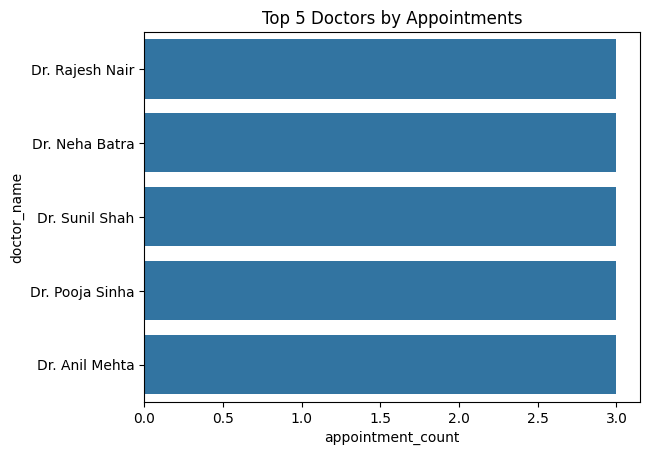

In [3]:

query1 = """
SELECT d.name AS doctor_name, COUNT(a.appointment_id) AS appointment_count
FROM doctors d
JOIN appointments a ON d.doctor_id = a.doctor_id
GROUP BY d.name
ORDER BY appointment_count DESC
LIMIT 5;
"""
df1 = pd.read_sql(query1, conn)
df1
sns.barplot(data=df1, x='appointment_count', y='doctor_name')
plt.title("Top 5 Doctors by Appointments")
plt.show()

## 2. Patient Count by Department

  department_name  patient_count
0       Neurology              5
1      Cardiology              5
2        Oncology              3
3     Orthopedics              3
4      Pediatrics              3
5      Psychiatry              2
6             ENT              2
7     Dermatology              2


/var/folders/xt/z5xwzqrj5q38v4136vvnbr_h0000gn/T/ipykernel_87651/98535545.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


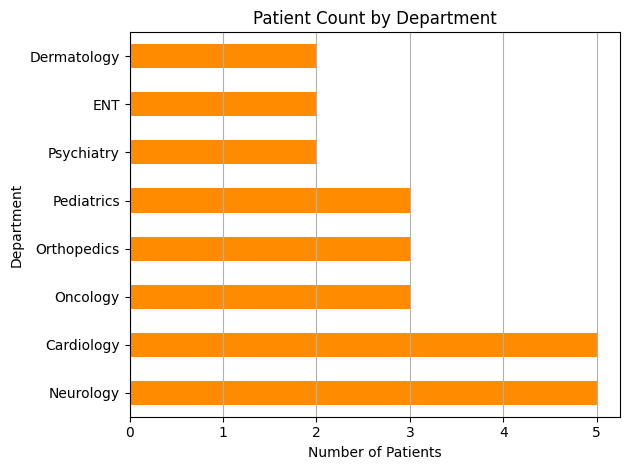

In [4]:
query2 = """
SELECT dep.name AS department_name, COUNT(DISTINCT a.patient_id) AS patient_count
FROM appointments a
JOIN doctors d ON a.doctor_id = d.doctor_id
JOIN departments dep ON d.department_id = dep.department_id
GROUP BY dep.name
ORDER BY patient_count DESC;
"""

df2 = pd.read_sql(query2, conn)
print(df2)

# Plotting
df2.plot(x='department_name', y='patient_count', kind='barh', legend=False,
         color='darkorange', title='Patient Count by Department')
plt.xlabel("Number of Patients")
plt.ylabel("Department")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 3. Most Prescribed Medicines (Top 5)

  medicine_name  times_prescribed
0   Amoxicillin                 2
1    Cetirizine                 2
2  Atorvastatin                 2
3     Ibuprofen                 2
4  Azithromycin                 2


/var/folders/xt/z5xwzqrj5q38v4136vvnbr_h0000gn/T/ipykernel_87651/2840308528.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


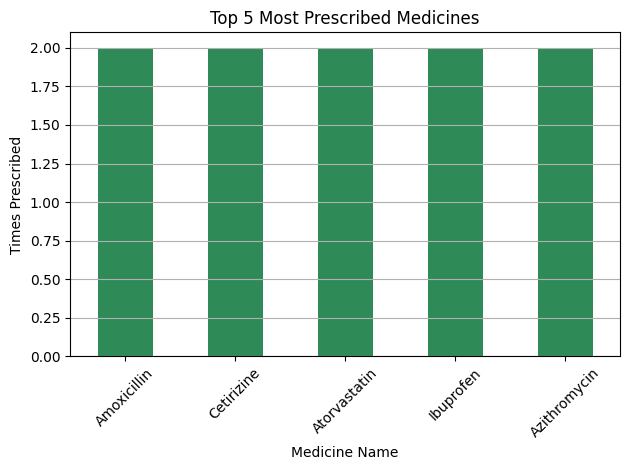

In [5]:
query3 = """
SELECT m.name AS medicine_name, COUNT(p.prescription_id) AS times_prescribed
FROM prescriptions p
JOIN medicines m ON p.medicine_id = m.medicine_id
GROUP BY m.name
ORDER BY times_prescribed DESC
LIMIT 5;
"""

df3 = pd.read_sql(query3, conn)
print(df3)

# Plotting
df3.plot(x='medicine_name', y='times_prescribed', kind='bar',
         color='seagreen', legend=False, title='Top 5 Most Prescribed Medicines')
plt.ylabel("Times Prescribed")
plt.xlabel("Medicine Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [6]:
query4 = """
WITH dept_appointments AS (
    SELECT 
        dep.name AS department_name,
        COUNT(a.appointment_id) AS total_appointments
    FROM appointments a
    JOIN doctors d ON a.doctor_id = d.doctor_id
    JOIN departments dep ON d.department_id = dep.department_id
    GROUP BY dep.name
)
SELECT 
    department_name,
    total_appointments,
    RANK() OVER (ORDER BY total_appointments DESC) AS dept_rank
FROM dept_appointments;
"""
df4 = pd.read_sql(query4, conn)
print(df4)

/var/folders/xt/z5xwzqrj5q38v4136vvnbr_h0000gn/T/ipykernel_87651/2128935993.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


  department_name  total_appointments  dept_rank
0       Neurology                   5          1
1      Cardiology                   5          1
2      Pediatrics                   3          3
3        Oncology                   3          3
4     Orthopedics                   3          3
5      Psychiatry                   2          6
6     Dermatology                   2          6
7             ENT                   2          6


In [7]:
# ✅ Close the connection
conn.close()